In [2708]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2709]:
df = pd.read_csv('fifa_players.csv')

In [2710]:
df['id'] = df.index
df.set_index('id', inplace=True)

In [2711]:
df.head()

,name,full_name,birth_date,age,height_cm,weight_kgs,positions,nationality,overall_rating,potential,...,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle
id,,,,,,,,,,,,,,,,,,,,,
0,L. Messi,Lionel Andrés Messi Cuccittini,6/24/1987,31,170.18,72.1,"CF,RW,ST",Argentina,94,94,...,94,48,22,94,94,75,96,33,28,26
1,C. Eriksen,Christian Dannemann Eriksen,2/14/1992,27,154.94,76.2,"CAM,RM,CM",Denmark,88,89,...,89,46,56,84,91,67,88,59,57,22
2,P. Pogba,Paul Pogba,3/15/1993,25,190.50,83.9,"CM,CAM",France,88,91,...,82,78,64,82,88,82,87,63,67,67
3,L. Insigne,Lorenzo Insigne,6/4/1991,27,162.56,59.0,"LW,ST",Italy,88,88,...,84,34,26,83,87,61,83,51,24,22
4,K. Koulibaly,Kalidou Koulibaly,6/20/1991,27,187.96,88.9,CB,Senegal,88,91,...,15,87,88,24,49,33,80,91,88,87


In [2712]:
df.drop([
    'name', 'full_name', 'birth_date' , 'national_team' , 'national_rating' , 'national_team_position',
    'national_jersey_number','value_euro','wage_euro','release_clause_euro', 'potential',
    'composure', 'reactions'
    ], axis=1, inplace=True)

In [2713]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17954 entries, 0 to 17953
Data columns (total 38 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            17954 non-null  int64  
 1   height_cm                      17954 non-null  float64
 2   weight_kgs                     17954 non-null  float64
 3   positions                      17954 non-null  object 
 4   nationality                    17954 non-null  object 
 5   overall_rating                 17954 non-null  int64  
 6   preferred_foot                 17954 non-null  object 
 7   international_reputation(1-5)  17954 non-null  int64  
 8   weak_foot(1-5)                 17954 non-null  int64  
 9   skill_moves(1-5)               17954 non-null  int64  
 10  body_type                      17954 non-null  object 
 11  crossing                       17954 non-null  int64  
 12  finishing                      17954 non-null  int6

# Histogram

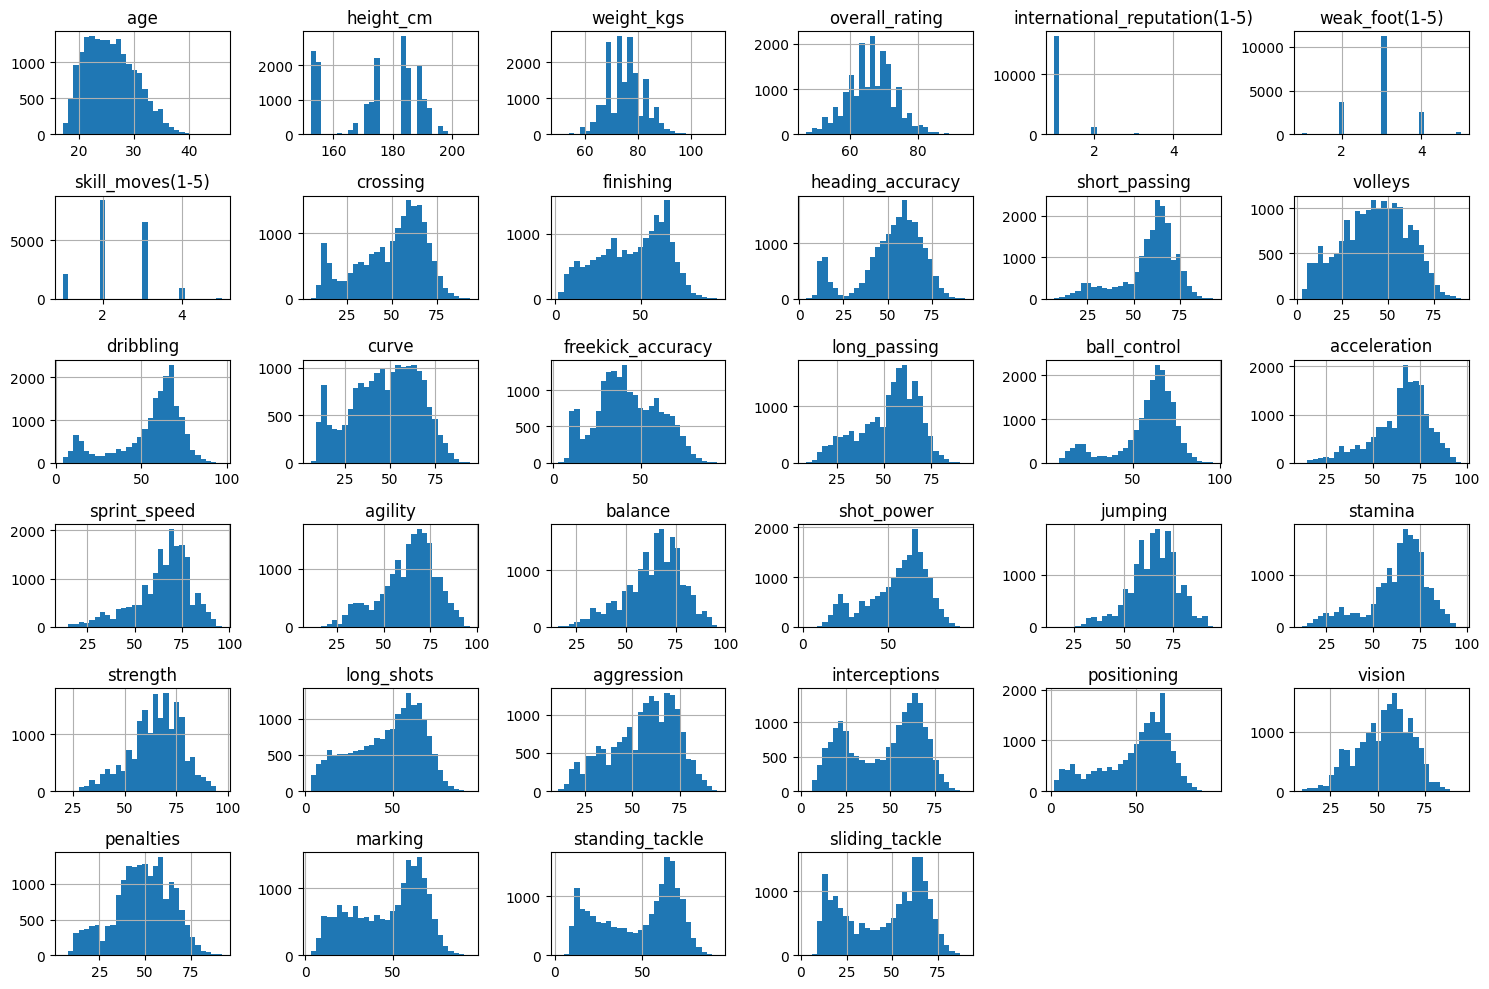

In [2714]:
df.hist(figsize=(15, 10), bins=30)
plt.tight_layout()
plt.show()

# Handle missing values

## Remove missing values

In [2715]:
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]
print(missing_values)

Series([], dtype: int64)


In [2716]:
missing_cols = missing_values.index.tolist()
missing_cols

[]

In [2717]:
df = df.dropna()
df.shape

(17954, 38)

# Handle 'String' attributes

In [2718]:
object_cols = df.select_dtypes(include='object').columns

object_cols

Index(['positions', 'nationality', 'preferred_foot', 'body_type'], dtype='object')

## preferred_foot

In [2719]:
df['preferred_foot'].value_counts()

preferred_foot
Right    13781
Left      4173
Name: count, dtype: int64

## body_type

In [2720]:
df['body_type'].value_counts()

body_type
Normal                 10393
Lean                    6468
Stocky                  1086
Messi                      1
Courtois                   1
PLAYER_BODY_TYPE_25        1
Akinfenwa                  1
Shaqiri                    1
Neymar                     1
C. Ronaldo                 1
Name: count, dtype: int64

In [2721]:
valid_body_types = ['Normal', 'Lean', 'Stocky']
df = df[df['body_type'].isin(valid_body_types)]

In [2722]:
df['body_type'].value_counts()

body_type
Normal    10393
Lean       6468
Stocky     1086
Name: count, dtype: int64

## nationality

In [2723]:
df['nationality'].value_counts()

nationality
England                 1657
Germany                 1199
Spain                   1070
France                   925
Argentina                903
                        ... 
Papua New Guinea           1
South Sudan                1
Malta                      1
Yemen                      1
United Arab Emirates       1
Name: count, Length: 160, dtype: int64

In [2724]:
region_mapping = {
    "Western Europe": ["Germany", "France", "Italy", "Spain", "Portugal", "England", "Netherlands", "Belgium", "Switzerland"],
    "Eastern and Northern Europe": ["Russia", "Ukraine", "Poland", "Sweden", "Norway", "Denmark", "Finland"],
    "Southern Europe and Balkans": ["Greece", "Croatia", "Serbia", "Turkey", "Romania"],
    "North Africa and Middle East": ["Egypt", "Tunisia", "Morocco", "Iran", "Saudi Arabia"],
    "Sub-Saharan Africa": ["Nigeria", "Ghana", "Senegal", "Ivory Coast", "Cameroon"],
    "South America": ["Brazil", "Argentina", "Chile", "Colombia", "Uruguay"],
    "Central America and Caribbean": ["Mexico", "Costa Rica", "Jamaica", "Honduras"],
    "North America": ["United States", "Canada"],
    "East Asia": ["Japan", "South Korea", "China", "North Korea"],
    "Southeast Asia": ["Vietnam", "Thailand", "Indonesia", "Malaysia", "Philippines"],
    "South Asia": ["India", "Pakistan", "Bangladesh", "Nepal"],
    "Oceania": ["Australia", "New Zealand", "Fiji"]
}

country_to_region = {country: region for region, countries in region_mapping.items() for country in countries}

df['region'] = df['nationality'].map(country_to_region).fillna('Other')

In [2725]:
df['region'].value_counts()

region
Western Europe                   6751
Other                            3413
South America                    2851
Eastern and Northern Europe      1595
Southern Europe and Balkans       690
Sub-Saharan Africa                552
North Africa and Middle East      489
East Asia                         466
Central America and Caribbean     423
North America                     401
Oceania                           278
South Asia                         30
Southeast Asia                      8
Name: count, dtype: int64

In [2726]:
df.drop('nationality', axis=1, inplace=True)

In [2727]:
df.head()

,age,height_cm,weight_kgs,positions,overall_rating,preferred_foot,international_reputation(1-5),weak_foot(1-5),skill_moves(1-5),body_type,...,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,region
id,,,,,,,,,,,,,,,,,,,,,
1,27,154.94,76.2,"CAM,RM,CM",88,Right,3,5,4,Lean,...,89,46,56,84,91,67,59,57,22,Eastern and Northern Europe
2,25,190.50,83.9,"CM,CAM",88,Right,4,4,5,Normal,...,82,78,64,82,88,82,63,67,67,Western Europe
3,27,162.56,59.0,"LW,ST",88,Right,3,4,4,Normal,...,84,34,26,83,87,61,51,24,22,Western Europe
4,27,187.96,88.9,CB,88,Right,3,3,2,Normal,...,15,87,88,24,49,33,91,88,87,Sub-Saharan Africa
5,27,193.04,92.1,CB,88,Right,3,3,2,Normal,...,64,82,88,41,60,62,90,89,84,Western Europe


## positions

In [2728]:
df['positions'].value_counts()

positions
CB              2243
GK              2064
ST              1746
CM               764
CDM,CM           709
                ... 
LB,LM,CB           1
CF,CM,ST           1
CB,ST              1
RB,ST              1
CAM,CM,RW,RM       1
Name: count, Length: 889, dtype: int64

In [2729]:
df['positions'] = df['positions'].str.split(',')
df['positions']


id
1        [CAM, RM, CM]
2            [CM, CAM]
3             [LW, ST]
4                 [CB]
5                 [CB]
             ...      
17949    [RM, CAM, CM]
17950             [LB]
17951             [GK]
17952         [ST, LM]
17953             [ST]
Name: positions, Length: 17947, dtype: object

In [2730]:
attacker = ['ST', 'LW', 'RW',  'CF' ,'CAM', 'RM', 'LM']
midfielder = ['CM', 'CDM', 'CAM','RM','LM' ]
defender = ['CB', 'LB', 'RB', 'LWB', 'RWB']
goalkeeper = ['GK']

# Encoding

In [2731]:
object_cols = df.select_dtypes(include='object').columns
object_cols

Index(['positions', 'preferred_foot', 'body_type', 'region'], dtype='object')

## preferred_foot

In [2732]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
temp_encoded = le.fit_transform(df['preferred_foot'])

for original, encoded in zip(le.classes_, range(len(le.classes_))):
    print(f"{original} -> {encoded}")

df['preferred_foot'] = temp_encoded

Left -> 0
Right -> 1


## body_type

In [2733]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
temp_encoded = le.fit_transform(df['body_type'])

for original, encoded in zip(le.classes_, range(len(le.classes_))):
    print(f"{original} -> {encoded}")

df['body_type'] = temp_encoded

Lean -> 0
Normal -> 1
Stocky -> 2


## region

In [2734]:
temp_encoded = le.fit_transform(df['region'])

for original, encoded in zip(le.classes_, range(len(le.classes_))):
    print(f"{original} -> {encoded}")

df['region'] = temp_encoded


Central America and Caribbean -> 0
East Asia -> 1
Eastern and Northern Europe -> 2
North Africa and Middle East -> 3
North America -> 4
Oceania -> 5
Other -> 6
South America -> 7
South Asia -> 8
Southeast Asia -> 9
Southern Europe and Balkans -> 10
Sub-Saharan Africa -> 11
Western Europe -> 12


In [2735]:
df.head()

,age,height_cm,weight_kgs,positions,overall_rating,preferred_foot,international_reputation(1-5),weak_foot(1-5),skill_moves(1-5),body_type,...,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,region
id,,,,,,,,,,,,,,,,,,,,,
1,27,154.94,76.2,"[CAM, RM, CM]",88,1,3,5,4,0,...,89,46,56,84,91,67,59,57,22,2
2,25,190.50,83.9,"[CM, CAM]",88,1,4,4,5,1,...,82,78,64,82,88,82,63,67,67,12
3,27,162.56,59.0,"[LW, ST]",88,1,3,4,4,1,...,84,34,26,83,87,61,51,24,22,12
4,27,187.96,88.9,[CB],88,1,3,3,2,1,...,15,87,88,24,49,33,91,88,87,11
5,27,193.04,92.1,[CB],88,1,3,3,2,1,...,64,82,88,41,60,62,90,89,84,12


## positions

In [2736]:

df['position_attacker'] = 0
df['position_midfielder'] = 0
df['position_defender'] = 0
df['position_goalkeeper'] = 0

def position_count(positions, idx):
    for pos in positions:
        if pos in attacker:
            df.at[idx, 'position_attacker'] = 1
        if pos in midfielder:
            df.at[idx, 'position_midfielder'] = 1
        if pos in defender:
            df.at[idx, 'position_defender'] = 1
        if pos in goalkeeper:
            df.at[idx, 'position_goalkeeper'] = 1
for idx, row in df.iterrows():
    position_count(row['positions'], idx)
df.drop('positions', axis=1, inplace=True)



In [2737]:
df.head()

,age,height_cm,weight_kgs,overall_rating,preferred_foot,international_reputation(1-5),weak_foot(1-5),skill_moves(1-5),body_type,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,region,position_attacker,position_midfielder,position_defender,position_goalkeeper
id,,,,,,,,,,,,,,,,,,,,,
1,27,154.94,76.2,88,1,3,5,4,0,88,...,91,67,59,57,22,2,1,1,0,0
2,25,190.50,83.9,88,1,4,4,5,1,80,...,88,82,63,67,67,12,1,1,0,0
3,27,162.56,59.0,88,1,3,4,4,1,86,...,87,61,51,24,22,12,1,0,0,0
4,27,187.96,88.9,88,1,3,3,2,1,30,...,49,33,91,88,87,11,0,0,1,0
5,27,193.04,92.1,88,1,3,3,2,1,53,...,60,62,90,89,84,12,0,0,1,0


# Outlier

In [2738]:
import math
from sklearn.ensemble import IsolationForest

def detect_outliers_iqr(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    return outliers

remove_columns = ['overall_rating', 'position_goalkeeper']

def process_outliers(data):
    numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns

    outlier_columns = []
    outlier_percentages = []

    for col in numeric_columns:
        outliers = detect_outliers_iqr(data, col)
        total_rows = len(data)
        num_outliers = len(outliers)
        
        if num_outliers > 0:
            outlier_columns.append(col)
            outlier_percentages.append((num_outliers / total_rows) * 100)
            
    outlier_columns = [col for col in outlier_columns if not col.endswith("(1-5)")]
    for col in remove_columns:
        outlier_columns = [column for column in outlier_columns if column != col]

    return sorted(zip(outlier_columns, outlier_percentages), key=lambda x: x[1], reverse=True)

sorted_outliers = process_outliers(df)
print(sorted_outliers)
df.shape


[('dribbling', 37.64417451384632), ('balance', 11.528389145818242), ('sprint_speed', 10.926617261937928), ('short_passing', 8.792555858917925), ('acceleration', 8.703404468713433), ('ball_control', 5.778124477628573), ('jumping', 4.089820025631025), ('shot_power', 2.83612860088037), ('strength', 1.3707026243940492), ('stamina', 1.1533961107706023), ('heading_accuracy', 0.8747980163815678), ('weight_kgs', 0.640775617094779), ('long_passing', 0.2730261325012537), ('age', 0.16715885663342062), ('agility', 0.09472335209227169), ('vision', 0.089151390204491)]


(17947, 41)

## dribbling

In [2739]:
from sklearn.ensemble import IsolationForest
model = IsolationForest(contamination=0.37)  
df['outlier'] = model.fit_predict(df[['dribbling']])  
print(df.shape[0])
df['dribbling_smoothed'] = df['dribbling'].rolling(window = 39, center=True).median()

df.loc[df['outlier'] == -1, 'dribbling'] = df.loc[df['outlier'] == -1, 'dribbling_smoothed']
df.drop(['outlier', 'dribbling_smoothed'], axis=1, inplace=True)
df.dropna(inplace=True)


17947


In [2740]:
df.shape

(17921, 41)

## balance

In [2741]:
model = IsolationForest(contamination=0.11)  
df['outlier'] = model.fit_predict(df[['balance']])  

df['balance_smoothed'] = df['balance'].rolling(window=5, center=True).median()

df.loc[df['outlier'] == -1, 'balance'] = df.loc[df['outlier'] == -1, 'balance_smoothed']
df.drop(['outlier', 'balance_smoothed'], axis=1, inplace=True)
df.dropna(inplace=True)

In [2742]:
df.shape

(17921, 41)

# Standardization 

In [2743]:
from sklearn.preprocessing import RobustScaler
robust_scaler = RobustScaler()

In [2744]:
# height_cm 
df['height_cm']= robust_scaler.fit_transform(df['height_cm'].values.reshape(-1, 1))


In [2745]:
df.head()

,age,height_cm,weight_kgs,overall_rating,preferred_foot,international_reputation(1-5),weak_foot(1-5),skill_moves(1-5),body_type,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,region,position_attacker,position_midfielder,position_defender,position_goalkeeper
id,,,,,,,,,,,,,,,,,,,,,
4,27,0.416667,88.9,88,1,3,3,2,1,30,...,49,33,91,88,87,11,0,0,1,0
5,27,0.583333,92.1,88,1,3,3,2,1,53,...,60,62,90,89,84,12,0,0,1,0
16,24,0.416667,79.8,86,1,1,4,2,1,40,...,57,56,92,89,84,6,0,0,1,0
20,31,0.416667,86.2,87,0,3,3,3,1,72,...,68,66,89,87,88,12,0,0,1,0
22,30,0.000000,79.8,87,0,4,4,5,1,90,...,82,59,71,82,83,7,0,0,1,0


# Export new train.csv

In [2746]:
df.to_csv('data.csv', index=False)